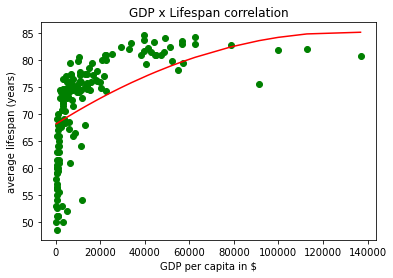

RMSE:  7.160923049220074 

k1:  [0.54470653] 
k2:  [0.98255299] 
k3:  [-0.51191482]


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

# ---- Essentials ----

plt.title("GDP x Lifespan correlation")
plt.ylabel("average lifespan (years)") 
plt.xlabel("GDP per capita in $")

nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True)

perCapita = nations[:,3]/nations[:,6]*1000000
age = nations[:,4]


# ---- Normalizing ----

def normalizeMinMax(values):
    min = np.amin(values)
    max = np.amax(values)
    
    norm = (values-min)/(max-min)
    return norm

def deNormalize(values, origin):
    min = np.amin(origin)
    max = np.amax(origin)
    
    deNorm = values * (max - min) + min
    return deNorm



# ---- Approximation function ----

def rndApprox(xValues):

    x = np.sort(xValues)

    x = np.expand_dims(xValues, axis = 0)
    p = np.expand_dims(np.arange(0,3), axis = 1)
    x2 = np.power(x, p)

    coeffs = np.array([rnd.uniform(-1,1),rnd.uniform(-1,1),rnd.uniform(-1,1)])
    coeffs = np.expand_dims(coeffs, axis = 1)

    y = np.matmul(x2.transpose(), coeffs) 
    
    return coeffs, y


# ---- RMSE calculation function ----

def getRMSE(y, y1):
    y1 = y1.transpose() # <-- somehow this seems to be nessecary... :/
   
    rmse = np.sqrt(np.mean((y1-y)**2))
    
    return rmse




# ---- MAIN ----


perCapitaNorm = normalizeMinMax(perCapita) # normalize
ageNorm = normalizeMinMax(age) # normalize

bestResult = rndApprox(perCapitaNorm) # first step

for i in range(10000):
    result = rndApprox(perCapitaNorm) # repeat
    if getRMSE(ageNorm, result[1]) <  getRMSE(ageNorm, bestResult[1]): # compare
        bestResult = result


bestResult = [bestResult[0], deNormalize(bestResult[1], age)] # denormalize


x, y = zip(*sorted(zip(perCapita, bestResult[1]))) # <-- little trick to sort x-values 
                         # Source: https://stackoverflow.com/questions/37414916/pythons-matplotlib-plotting-in-wrong-order

# plot
plt.plot(perCapita, age, "og")        
plt.plot(x, y, "r")
plt.show()

print("RMSE: " , getRMSE(age, bestResult[1]), "\n\nk1: ", bestResult[0][0], "\nk2: ", bestResult[0][1], "\nk3: ", bestResult[0][2])